In [ ]:
Steps:
    1) Import the Data
    2) Clean the Data
    3) Split the Data into Training/Test Sets
    4) Create a Model                           #Select a ML Algorithm to build a Model
    5) Train the Model
    6) Make Predictions
    7) Evaluate and Improve
    

In [7]:
#1)
import pandas as pd
music_data = pd.read_csv('D:/Users/Lucky/(MDI3002)Foundations of Data Science(FALL-2021)/LAB(Done by me)/music.csv')
music_data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [9]:
#2)
#No null/duplicate values in the dataset to clean 

In [10]:
#3)
X = music_data.drop(columns=['genre'])
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [11]:
y = music_data['genre']
y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

In [12]:
#4)
from sklearn.tree import DecisionTreeClassifier     #ML library which contains ML algorithms
model = DecisionTreeClassifier()

#5)
model.fit(X,y)

#6)
predictions = model.predict([[21,1],[22,0]])
predictions

array(['HipHop', 'Dance'], dtype=object)

In [18]:
#7)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)  #20% of data allocated for testing
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
score

1.0

In [19]:
pip install joblib

In [20]:
#Persisting Models(Saving the Model for future use)
import joblib
joblib.dump(model, 'music-recommender.joblib')

['music-recommender.joblib']

In [21]:
#Re-using the saved Model
model = joblib.load('music-recommender.joblib')
predictions = model.predict([[21, 1]])
predictions

array(['HipHop'], dtype=object)

In [22]:
#Visualizing a Decision Tree
from sklearn import tree
tree.export_graphviz(model, out_file='music-recommender.dot',feature_names=
                     ['age','gender'],class_names=sorted(y.unique()),
                     label='all',rounded=True,filled=True)

[Text(209.25, 190.26, 'X[0] <= 30.5\ngini = 0.724\nsamples = 14\nvalue = [3, 6, 2, 2, 1]'),
 Text(167.4, 135.9, 'X[0] <= 25.5\ngini = 0.719\nsamples = 8\nvalue = [3, 0, 2, 2, 1]'),
 Text(83.7, 81.53999999999999, 'X[1] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [0, 0, 2, 2, 0]'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0]'),
 Text(251.10000000000002, 81.53999999999999, 'X[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 0, 0, 0, 1]'),
 Text(209.25, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1]'),
 Text(251.10000000000002, 135.9, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0, 0]')]

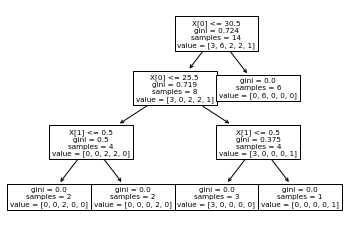

In [25]:
tree.plot_tree(model)